- notes: 

concatenate all csv files, go thru individually by columns (speech acts), create text column (utterances), and tokenize words. 

next steps - clean corpus, start analysis of roles, plot bigrams + trigrams

# Speech Acts

In [1]:
from os import listdir
import pandas as pd
import nltk
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
import matplotlib
import matplotlib.pyplot as plt

In [2]:
filepaths = [f for f in listdir("./") if f.endswith('.csv')]


In [3]:
df = pd.concat(map(pd.read_csv, filepaths))

# Check Column E

In [4]:
dfE = df[df.E > 0]
dfE.columns = ['E', 'P', 'Qc', 'Qi', 'Qr', 'Ra', 'Rm', 'Rd', 'S', 'J', 'N', 'C', 'Speaker', 'Text', 'Utterances', 'Unnamed']

In [5]:
print(dfE)

     E  P  Qc  Qi  Qr  Ra  Rm  Rd  S  J  N  C Speaker  \
0    1  2   0   0   0   0   0   0  0  0  0  0       A   
1    1  0   0   0   0   1   2   0  0  0  0  0       B   
3    2  1   0   0   0   0   0   0  0  3  0  0       B   
4    2  1   0   0   0   0   0   0  0  3  1  0       A   
5    3  0   0   0   0   0   0   0  0  3  0  0       B   
..  .. ..  ..  ..  ..  ..  ..  .. .. .. .. ..     ...   
106  3  0   0   0   0   0   2   0  0  1  0  0       B   
107  2  0   0   0   0   0   1   0  0  3  0  0       B   
108  3  0   0   0   0   0   0   0  0  0  0  0       B   
110  2  0   3   0   0   0   0   0  3  0  0  0       B   
115  3  0   0   0   0   0   0   0  3  0  0  0       B   

                                                  Text Utterances Unnamed  
0    so we need this and duplicate like we only hav...        NaN     NaN  
1                                      only one bridge        NaN     NaN  
3                          can we say if we cross here        NaN     NaN  
4          

In [6]:
print(dfE.Text)

0      so we need this and duplicate like we only hav...
1                                        only one bridge
3                            can we say if we cross here
4                             and then connect to b or e
5                           and then comes back this way
                             ...                        
106    because if we have already the point is that i...
107    cause it s actually it seems longer from here ...
108              kind of you know the idea of a triangle
110    are you sure i want to make sure that it s i a...
115    i m kind of messy with that i love drawing but...
Name: Text, Length: 2654, dtype: object


In [7]:
mask = [isinstance(item, (str, bytes)) for item in dfE.Text]
dfE = dfE.loc[mask]
dfE.Text = dfE.Text.astype(str)

In [8]:
dfE = dfE.Text
print(dfE)

0      so we need this and duplicate like we only hav...
1                                        only one bridge
3                            can we say if we cross here
4                             and then connect to b or e
5                           and then comes back this way
                             ...                        
106    because if we have already the point is that i...
107    cause it s actually it seems longer from here ...
108              kind of you know the idea of a triangle
110    are you sure i want to make sure that it s i a...
115    i m kind of messy with that i love drawing but...
Name: Text, Length: 1908, dtype: object


In [9]:
top_N = 25
word_dist = nltk.FreqDist(dfE)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
                   Word  Frequency
0             let s see         10
1                    so          9
2              and then          9
3                  yeah          6
4                  this          5
5          i don t know          5
6                  here          4
7                    no          4
8                   hmm          4
9                   and          4
10                three          3
11            like that          3
12              one two          2
13           let me see          2
14     this one i guess          2
15                    h          2
16          i like that          2
17                 wait          2
18                there          2
19                draws          2
20                 done          2
21                  but          2
22         let me think          2
23  i think we are good          2
24                 well          2


<AxesSubplot:xlabel='Word'>

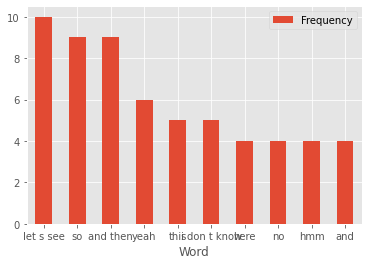

In [10]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=0, width=0.5)

In [11]:
dft = dfE.apply(nltk.word_tokenize)
print(dft)

0      [so, we, need, this, and, duplicate, like, we,...
1                                    [only, one, bridge]
3                    [can, we, say, if, we, cross, here]
4                     [and, then, connect, to, b, or, e]
5                    [and, then, comes, back, this, way]
                             ...                        
106    [because, if, we, have, already, the, point, i...
107    [cause, it, s, actually, it, seems, longer, fr...
108    [kind, of, you, know, the, idea, of, a, triangle]
110    [are, you, sure, i, want, to, make, sure, that...
115    [i, m, kind, of, messy, with, that, i, love, d...
Name: Text, Length: 1908, dtype: object


In [12]:
lists =  dft
words = []
for wordList in lists:
    words += wordList
fdist = FreqDist(words)

### Unigram

In [13]:
top_N = 25
word_dist = nltk.FreqDist(fdist)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
    Word  Frequency
0     to        846
1    the        749
2      i        693
3     we        644
4     it        611
5    and        540
6   this        493
7   that        484
8     so        479
9      s        443
10  then        406
11  like        376
12  here        364
13     a        359
14   you        335
15    go        323
16    is        299
17  have        287
18    if        275
19    be        248
20     t        241
21   one        225
22  back        214
23  just        206
24  yeah        201


<AxesSubplot:xlabel='Word'>

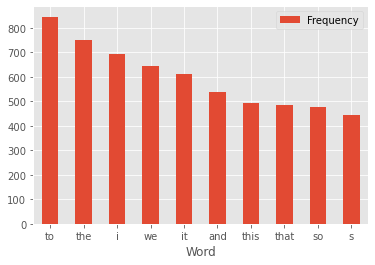

In [14]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=0, width=0.5)

### Bigram

In [15]:
word_fd = nltk.FreqDist(words)
bigram_fd = nltk.FreqDist(nltk.bigrams(words))
bigram_fd.most_common(25)

[(('and', 'then'), 221),
 (('it', 's'), 191),
 (('have', 'to'), 185),
 (('i', 'think'), 137),
 (('to', 'go'), 129),
 (('that', 's'), 124),
 (('if', 'we'), 122),
 (('don', 't'), 118),
 (('we', 'can'), 93),
 (('this', 'is'), 83),
 (('this', 'way'), 82),
 (('i', 'don'), 80),
 (('would', 'be'), 73),
 (('let', 's'), 69),
 (('the', 'same'), 68),
 (('here', 'and'), 65),
 (('so', 'we'), 64),
 (('we', 'have'), 64),
 (('i', 'm'), 64),
 (('like', 'this'), 63),
 (('i', 'mean'), 63),
 (('going', 'to'), 61),
 (('to', 'be'), 60),
 (('so', 'i'), 60),
 (('the', 'base'), 59)]

### Trigram

In [16]:
word_fd = nltk.FreqDist(words)
trigram_fd = nltk.FreqDist(nltk.trigrams(words))
trigram_fd.most_common(25)

[(('i', 'don', 't'), 80),
 (('have', 'to', 'go'), 58),
 (('don', 't', 'know'), 52),
 (('we', 'have', 'to'), 44),
 (('let', 's', 'see'), 40),
 (('to', 'go', 'back'), 35),
 (('here', 'and', 'then'), 33),
 (('you', 'have', 'to'), 28),
 (('i', 'think', 'that'), 24),
 (('here', 'here', 'here'), 24),
 (('it', 'would', 'be'), 24),
 (('that', 's', 'the'), 23),
 (('i', 'think', 'it'), 23),
 (('we', 'don', 't'), 23),
 (('t', 'have', 'to'), 23),
 (('go', 'this', 'way'), 22),
 (('all', 'the', 'way'), 22),
 (('this', 'is', 'the'), 20),
 (('that', 'would', 'be'), 20),
 (('i', 'think', 'we'), 20),
 (('one', 'two', 'three'), 20),
 (('don', 't', 'think'), 20),
 (('two', 'three', 'four'), 19),
 (('and', 'then', 'go'), 18),
 (('is', 'the', 'base'), 18)]

# Check Column P

In [17]:
dfP = df[df.P > 0]
dfP.columns = ['E', 'P', 'Qc', 'Qi', 'Qr', 'Ra', 'Rm', 'Rd', 'S', 'J', 'N', 'C', 'Speaker', 'Text', 'Utterances', 'Unnamed']

In [18]:
print(dfP)

     E  P  Qc  Qi  Qr  Ra  Rm  Rd  S  J  N  C Speaker  \
0    1  2   0   0   0   0   0   0  0  0  0  0       A   
3    2  1   0   0   0   0   0   0  0  3  0  0       B   
4    2  1   0   0   0   0   0   0  0  3  1  0       A   
6    3  1   0   0   0   0   0   0  0  3  1  0       A   
10   2  1   0   0   0   0   0   0  0  0  0  0       A   
..  .. ..  ..  ..  ..  ..  ..  .. .. .. .. ..     ...   
51   1  2   0   0   0   0   0   0  0  0  0  0       A   
98   1  2   0   0   0   0   0   0  0  3  0  0       B   
99   3  3   0   1   0   0   0   0  0  2  0  0       B   
113  0  1   0   0   0   0   0   0  3  0  0  0       B   
114  0  1   2   0   0   0   0   0  0  0  0  0       A   

                                                  Text Utterances Unnamed  
0    so we need this and duplicate like we only hav...        NaN     NaN  
3                          can we say if we cross here        NaN     NaN  
4                           and then connect to b or e        NaN     NaN  
6    yeah o

In [19]:
print(dfP.Text)

0      so we need this and duplicate like we only hav...
3                            can we say if we cross here
4                             and then connect to b or e
6      yeah or what i am thinking is can it connect t...
10     i guess this will we could just have a brainst...
                             ...                        
51        right now i think that this should be the base
98     so let s take it for granted that we are start...
99     do you see what i am saying instead of connect...
113        okay i guess you can do that cause scary part
114                         did you want to draw that in
Name: Text, Length: 826, dtype: object


In [20]:
mask = [isinstance(item, (str, bytes)) for item in dfP.Text]
dfP = dfP.loc[mask]
dfP.Text = dfP.Text.astype(str)

In [21]:
dfPT = dfP.Text
print (dfPT)

0      so we need this and duplicate like we only hav...
3                            can we say if we cross here
4                             and then connect to b or e
6      yeah or what i am thinking is can it connect t...
10     i guess this will we could just have a brainst...
                             ...                        
51        right now i think that this should be the base
98     so let s take it for granted that we are start...
99     do you see what i am saying instead of connect...
113        okay i guess you can do that cause scary part
114                         did you want to draw that in
Name: Text, Length: 617, dtype: object


In [22]:
top_N = 25
word_dist = nltk.FreqDist(dfP.Text)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
                                                 Word  Frequency
0                                       yeah go ahead          2
1                                            and then          2
2                                                down          2
3                                                   j          2
4                                            shall we          2
5                                           let s see          2
6                                               there          2
7                                          start here          2
8                                        try it again          2
9                                                yeah          2
10                                          like that          2
11  so we need this and duplicate like we only hav...          1
12                        can we say if we cross here          1
13                         and then connect to b or e          1
14  yeah 

<AxesSubplot:xlabel='Word'>

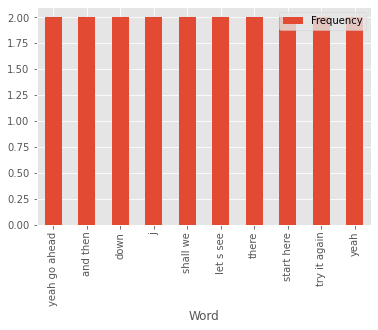

In [23]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=90, width=0.5)

In [24]:
dft = dfP.Text.apply(nltk.word_tokenize)
print(dft)

0      [so, we, need, this, and, duplicate, like, we,...
3                    [can, we, say, if, we, cross, here]
4                     [and, then, connect, to, b, or, e]
6      [yeah, or, what, i, am, thinking, is, can, it,...
10     [i, guess, this, will, we, could, just, have, ...
                             ...                        
51     [right, now, i, think, that, this, should, be,...
98     [so, let, s, take, it, for, granted, that, we,...
99     [do, you, see, what, i, am, saying, instead, o...
113    [okay, i, guess, you, can, do, that, cause, sc...
114                 [did, you, want, to, draw, that, in]
Name: Text, Length: 617, dtype: object


In [25]:
lists =  dft
words = []
for wordList in lists:
    words += wordList
fdist = FreqDist(words)

### Unigram

In [26]:
top_N = 25
word_dist = nltk.FreqDist(fdist)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
     Word  Frequency
0      we        273
1      to        263
2     the        219
3     and        208
4    then        200
5    this        196
6    here        185
7      so        179
8      it        165
9       i        157
10   that        147
11     go        130
12   like        124
13      a        120
14      s        118
15    you        105
16     if         88
17     do         78
18    can         77
19   just         75
20    one         70
21     be         69
22     is         68
23   have         66
24  think         66


<AxesSubplot:xlabel='Word'>

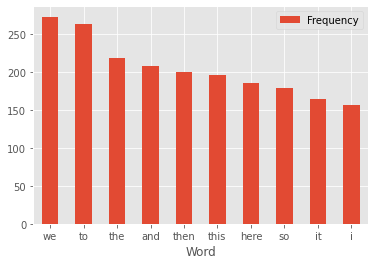

In [27]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=0, width=0.5)

### Bigram

In [28]:
word_fd = nltk.FreqDist(words)
bigram_fd = nltk.FreqDist(nltk.bigrams(words))
bigram_fd.most_common(25)

[(('and', 'then'), 117),
 (('i', 'think'), 54),
 (('let', 's'), 54),
 (('if', 'we'), 45),
 (('have', 'to'), 44),
 (('we', 'can'), 41),
 (('this', 'way'), 35),
 (('to', 'go'), 32),
 (('this', 'one'), 31),
 (('so', 'we'), 28),
 (('like', 'this'), 28),
 (('it', 's'), 27),
 (('here', 'and'), 26),
 (('that', 's'), 26),
 (('here', 'here'), 24),
 (('so', 'let'), 23),
 (('the', 'bridge'), 23),
 (('we', 'could'), 22),
 (('we', 'have'), 22),
 (('don', 't'), 21),
 (('this', 'is'), 20),
 (('then', 'we'), 20),
 (('here', 'so'), 19),
 (('would', 'be'), 19),
 (('want', 'to'), 19)]

### Trigram

In [29]:
word_fd = nltk.FreqDist(words)
trigram_fd = nltk.FreqDist(nltk.trigrams(words))
trigram_fd.most_common(25)

[(('so', 'let', 's'), 23),
 (('here', 'and', 'then'), 18),
 (('we', 'have', 'to'), 15),
 (('what', 'if', 'we'), 14),
 (('here', 'here', 'here'), 14),
 (('go', 'this', 'way'), 12),
 (('i', 'think', 'that'), 11),
 (('and', 'then', 'go'), 11),
 (('you', 'want', 'to'), 11),
 (('have', 'to', 'go'), 10),
 (('i', 'think', 'we'), 10),
 (('go', 'like', 'this'), 9),
 (('i', 'think', 'it'), 9),
 (('let', 's', 'see'), 9),
 (('like', 'this', 'and'), 8),
 (('i', 'don', 't'), 8),
 (('don', 't', 'know'), 8),
 (('we', 'could', 'do'), 8),
 (('and', 'then', 'we'), 8),
 (('that', 'and', 'then'), 8),
 (('this', 'way', 'and'), 8),
 (('it', 'would', 'be'), 8),
 (('this', 'this', 'this'), 7),
 (('we', 'can', 'go'), 7),
 (('let', 's', 'try'), 7)]

# Check Column Qc

In [30]:
dfQc = df[df.Qc > 0]
dfQc.columns = ['E', 'P', 'Qc', 'Qi', 'Qr', 'Ra', 'Rm', 'Rd', 'S', 'J', 'N', 'C', 'Speaker', 'Text', 'Utterances', 'Unnamed']

In [31]:
print(dfQc)

     E  P  Qc  Qi  Qr  Ra  Rm  Rd  S  J  N  C Speaker  \
12   3  0   1   0   0   0   0   0  0  0  0  0       B   
18   3  0   1   0   0   0   0   0  0  3  0  0       A   
19   0  0   1   1   0   1   0   0  0  0  0  0       B   
23   0  0   1   2   0   0   0   0  0  0  0  0       A   
39   1  0   1   1   0   0   0   0  0  3  0  0       A   
..  .. ..  ..  ..  ..  ..  ..  .. .. .. .. ..     ...   
61   0  0   2   1   0   0   0   0  0  0  0  0       B   
96   0  0   3   0   0   0   0   0  0  2  0  1       B   
102  3  0   2   0   0   0   0   0  0  0  0  0       A   
110  2  0   3   0   0   0   0   0  3  0  0  0       B   
114  0  1   2   0   0   0   0   0  0  0  0  0       A   

                                                  Text Utterances Unnamed  
12                                       to go through        NaN     NaN  
18                   yeah so this one may be confirmed        NaN     NaN  
19                                  that was confirmed        NaN     NaN  
23         

In [32]:
print(dfQc.Text)

12                                         to go through
18                     yeah so this one may be confirmed
19                                    that was confirmed
23                                              this one
39             if b as the base then we can go like this
                             ...                        
61     let s see if we did do that so where would you...
96     do we have to connect it here is that shorter ...
102    because we have to account for the building ma...
110    are you sure i want to make sure that it s i a...
114                         did you want to draw that in
Name: Text, Length: 643, dtype: object


In [33]:
mask = [isinstance(item, (str, bytes)) for item in dfQc.Text]
dfQc = dfQc.loc[mask]
dfQc.Text = dfQc.Text.astype(str)

In [34]:
dfQc = dfQc.Text
print(dfQc)

12                                         to go through
18                     yeah so this one may be confirmed
19                                    that was confirmed
23                                              this one
39             if b as the base then we can go like this
                             ...                        
61     let s see if we did do that so where would you...
96     do we have to connect it here is that shorter ...
102    because we have to account for the building ma...
110    are you sure i want to make sure that it s i a...
114                         did you want to draw that in
Name: Text, Length: 504, dtype: object


In [35]:
top_N = 25
word_dist = nltk.FreqDist(dfQc)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
                                                 Word  Frequency
0                                               right          8
1                                   what do you think          6
2                                                yeah          5
3                                you know what i mean          4
4                                does that make sense          3
5                           does e sound right to you          2
6                             do you want me to do it          2
7                                    what do you mean          2
8                             do you know what i mean          2
9                                                  or          2
10                                      to go through          1
11                  yeah so this one may be confirmed          1
12                                 that was confirmed          1
13                                           this one          1
14       

<AxesSubplot:xlabel='Word'>

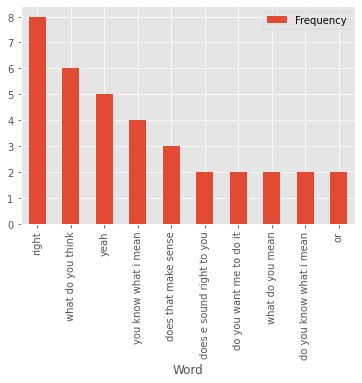

In [36]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=90, width=0.5)

In [37]:
dft = dfQc.apply(nltk.word_tokenize)
print(dft)

12                                     [to, go, through]
18             [yeah, so, this, one, may, be, confirmed]
19                                [that, was, confirmed]
23                                           [this, one]
39     [if, b, as, the, base, then, we, can, go, like...
                             ...                        
61     [let, s, see, if, we, did, do, that, so, where...
96     [do, we, have, to, connect, it, here, is, that...
102    [because, we, have, to, account, for, the, bui...
110    [are, you, sure, i, want, to, make, sure, that...
114                 [did, you, want, to, draw, that, in]
Name: Text, Length: 504, dtype: object


In [38]:
lists =  dft
words = []
for wordList in lists:
    words += wordList
fdist = FreqDist(words)

### Unigram

In [39]:
top_N = 25
word_dist = nltk.FreqDist(fdist)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
     Word  Frequency
0      to        202
1      we        182
2      it        150
3     you        146
4      do        128
5    that        127
6     the        126
7     and        116
8    this        107
9      so        101
10  right         98
11     go         92
12   here         92
13   then         86
14      i         85
15   what         85
16   like         80
17     is         77
18      s         68
19      a         66
20     if         63
21     be         61
22     or         56
23   have         54
24  think         52


<AxesSubplot:xlabel='Word'>

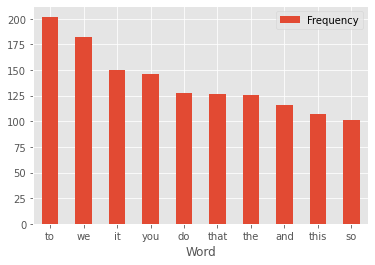

In [40]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=0, width=0.5)

### Bigram

In [41]:
word_fd = nltk.FreqDist(words)
bigram_fd = nltk.FreqDist(nltk.bigrams(words))
bigram_fd.most_common(25)

[(('do', 'you'), 67),
 (('and', 'then'), 46),
 (('you', 'think'), 37),
 (('to', 'go'), 34),
 (('have', 'to'), 32),
 (('want', 'to'), 31),
 (('if', 'we'), 30),
 (('you', 'want'), 30),
 (('what', 'if'), 23),
 (('it', 's'), 23),
 (('don', 't'), 23),
 (('we', 'have'), 22),
 (('that', 's'), 22),
 (('do', 'we'), 20),
 (('this', 'way'), 20),
 (('like', 'this'), 19),
 (('should', 'we'), 19),
 (('we', 'can'), 18),
 (('what', 'do'), 18),
 (('is', 'that'), 18),
 (('here', 'and'), 16),
 (('the', 'base'), 15),
 (('would', 'be'), 15),
 (('so', 'we'), 15),
 (('right', 'and'), 14)]

### Trigram

In [42]:
word_fd = nltk.FreqDist(words)
trigram_fd = nltk.FreqDist(nltk.trigrams(words))
trigram_fd.most_common()

[(('do', 'you', 'think'), 34),
 (('you', 'want', 'to'), 23),
 (('what', 'do', 'you'), 18),
 (('do', 'you', 'want'), 17),
 (('we', 'have', 'to'), 14),
 (('what', 'if', 'we'), 13),
 (('i', 'don', 't'), 12),
 (('have', 'to', 'go'), 11),
 (('right', 'and', 'then'), 10),
 (('you', 'know', 'what'), 10),
 (('know', 'what', 'i'), 10),
 (('go', 'like', 'this'), 9),
 (('it', 'would', 'be'), 9),
 (('don', 't', 'know'), 9),
 (('what', 'i', 'mean'), 9),
 (('to', 'go', 'back'), 9),
 (('would', 'it', 'be'), 8),
 (('here', 'to', 'here'), 8),
 (('you', 'think', 'it'), 8),
 (('have', 'to', 'connect'), 8),
 (('that', 's', 'the'), 7),
 (('here', 'and', 'then'), 6),
 (('if', 'we', 'did'), 6),
 (('want', 'to', 'go'), 6),
 (('it', 's', 'gon'), 6),
 (('s', 'gon', 'na'), 6),
 (('do', 'we', 'have'), 6),
 (('or', 'do', 'you'), 6),
 (('and', 'then', 'to'), 5),
 (('let', 's', 'see'), 5),
 (('right', 'so', 'we'), 5),
 (('want', 'me', 'to'), 5),
 (('from', 'here', 'to'), 5),
 (('so', 'this', 'is'), 5),
 (('all', 'th

# Check Column Qi

In [43]:
dfQi = df[df.Qi > 0]
dfQi.columns = ['E', 'P', 'Qc', 'Qi', 'Qr', 'Ra', 'Rm', 'Rd', 'S', 'J', 'N', 'C', 'Speaker', 'Text', 'Utterances', 'Unnamed']

In [44]:
print(dfQi)

     E  P  Qc  Qi  Qr  Ra  Rm  Rd  S  J  N  C Speaker  \
19   0  0   1   1   0   1   0   0  0  0  0  0       B   
23   0  0   1   2   0   0   0   0  0  0  0  0       A   
39   1  0   1   1   0   0   0   0  0  3  0  0       A   
70   0  0   0   2   0   1   0   0  0  0  0  0       B   
7    0  0   0   3   0   0   0   0  0  0  0  0       B   
..  .. ..  ..  ..  ..  ..  ..  .. .. .. .. ..     ...   
50   1  0   0   2   0   0   1   0  0  3  0  0       B   
61   0  0   2   1   0   0   0   0  0  0  0  0       B   
80   0  0   0   3   0   0   0   0  1  0  0  0       B   
99   3  3   0   1   0   0   0   0  0  2  0  0       B   
103  0  0   0   3   0   0   0   0  0  0  0  0       B   

                                                  Text Utterances Unnamed  
19                                  that was confirmed        NaN     NaN  
23                                            this one        NaN     NaN  
39           if b as the base then we can go like this        NaN     NaN  
70         

In [45]:
print(dfQi.Text)

19                                    that was confirmed
23                                              this one
39             if b as the base then we can go like this
70                                           that was it
7                              did you have the same map
                             ...                        
50            and then so you say that the base would be
61     let s see if we did do that so where would you...
80     so then we would go which way again sorry so y...
99     do you see what i am saying instead of connect...
103                                         for the what
Name: Text, Length: 533, dtype: object


In [46]:
mask = [isinstance(item, (str, bytes)) for item in dfQi.Text]
dfQi = dfQi.loc[mask]
dfQi.Text = dfQi.Text.astype(str)

In [47]:
dfQi = dfQi.Text
print(dfQi)

19                                    that was confirmed
23                                              this one
39             if b as the base then we can go like this
70                                           that was it
7                              did you have the same map
                             ...                        
50            and then so you say that the base would be
61     let s see if we did do that so where would you...
80     so then we would go which way again sorry so y...
99     do you see what i am saying instead of connect...
103                                         for the what
Name: Text, Length: 381, dtype: object


In [48]:
top_N = 25
word_dist = nltk.FreqDist(dfQi)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
                                                 Word  Frequency
0                                does that make sense          5
1                                you know what i mean          4
2                                            this one          2
3                                           like this          2
4                                    what do you mean          2
5                         do you know what i m saying          2
6                                  that was confirmed          1
7           if b as the base then we can go like this          1
8                                         that was it          1
9                           did you have the same map          1
10           t there similar t they similar distances          1
11                 connecting routes what do you mean          1
12                                              sorry          1
13                    and then do we build the bridge          1
14       

<AxesSubplot:xlabel='Word'>

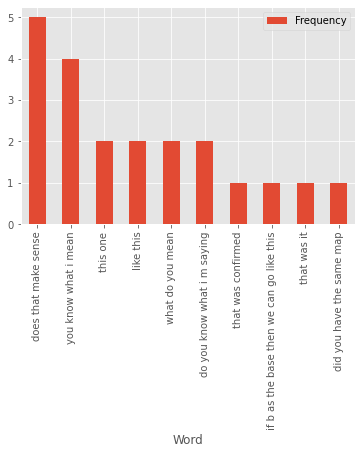

In [49]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=90, width=0.5)

In [50]:
dft = dfQi.apply(nltk.word_tokenize)
print(dft)

19                                [that, was, confirmed]
23                                           [this, one]
39     [if, b, as, the, base, then, we, can, go, like...
70                                       [that, was, it]
7                       [did, you, have, the, same, map]
                             ...                        
50     [and, then, so, you, say, that, the, base, wou...
61     [let, s, see, if, we, did, do, that, so, where...
80     [so, then, we, would, go, which, way, again, s...
99     [do, you, see, what, i, am, saying, instead, o...
103                                     [for, the, what]
Name: Text, Length: 381, dtype: object


In [51]:
lists =  dft
words = []
for wordList in lists:
    words += wordList
fdist = FreqDist(words)

### Unigram

In [52]:
top_N = 25
word_dist = nltk.FreqDist(fdist)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
     Word  Frequency
0     the        130
1      to        128
2     you        110
3      we         95
4     and         83
5   right         82
6      so         81
7      it         75
8      do         68
9    that         66
10   here         55
11     go         54
12   this         53
13      a         53
14   then         51
15      i         50
16   what         48
17     is         48
18      s         44
19   have         40
20    one         34
21   like         33
22      t         32
23     be         29
24    can         27


<AxesSubplot:xlabel='Word'>

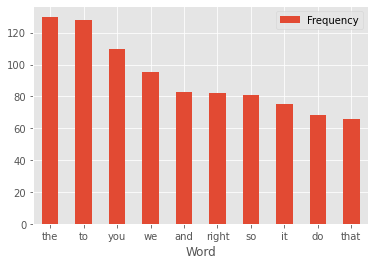

In [53]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=0, width=0.5)

### Bigram

In [54]:
word_fd = nltk.FreqDist(words)
bigram_fd = nltk.FreqDist(nltk.bigrams(words))
bigram_fd.most_common(25)

[(('and', 'then'), 32),
 (('do', 'you'), 28),
 (('have', 'to'), 25),
 (('you', 'want'), 16),
 (('so', 'we'), 15),
 (('it', 's'), 15),
 (('we', 'have'), 14),
 (('don', 't'), 14),
 (('right', 'and'), 13),
 (('want', 'to'), 13),
 (('so', 'you'), 13),
 (('to', 'go'), 13),
 (('the', 'base'), 12),
 (('what', 'i'), 12),
 (('is', 'that'), 12),
 (('the', 'same'), 11),
 (('do', 'we'), 11),
 (('you', 're'), 11),
 (('this', 'is'), 11),
 (('here', 'right'), 11),
 (('right', 'so'), 11),
 (('that', 's'), 10),
 (('the', 'truck'), 10),
 (('going', 'to'), 10),
 (('to', 'be'), 10)]

### Trigram

In [55]:
word_fd = nltk.FreqDist(words)
trigram_fd = nltk.FreqDist(nltk.trigrams(words))
trigram_fd.most_common(25)

[(('you', 'want', 'to'), 12),
 (('you', 'know', 'what'), 9),
 (('know', 'what', 'i'), 9),
 (('we', 'have', 'to'), 9),
 (('do', 'you', 'want'), 9),
 (('right', 'and', 'then'), 8),
 (('what', 'i', 'mean'), 6),
 (('i', 'don', 't'), 6),
 (('do', 'we', 'have'), 5),
 (('you', 're', 'saying'), 5),
 (('does', 'that', 'make'), 5),
 (('that', 'make', 'sense'), 5),
 (('they', 'have', 'to'), 5),
 (('what', 'do', 'you'), 4),
 (('do', 'you', 'mean'), 4),
 (('don', 't', 'know'), 4),
 (('do', 'you', 'think'), 4),
 (('only', 'one', 'bridge'), 4),
 (('right', 'does', 'that'), 4),
 (('it', 's', 'gon'), 4),
 (('s', 'gon', 'na'), 4),
 (('to', 'go', 'back'), 4),
 (('you', 'were', 'saying'), 4),
 (('so', 'you', 're'), 4),
 (('do', 'you', 'know'), 4)]

# Check Column Qr

In [56]:
dfQr = df[df.Qr > 0]
dfQr.columns = ['E', 'P', 'Qc', 'Qi', 'Qr', 'Ra', 'Rm', 'Rd', 'S', 'J', 'N', 'C', 'Speaker', 'Text', 'Utterances', 'Unnamed']

In [57]:
print(dfQr)

     E  P  Qc  Qi  Qr  Ra  Rm  Rd  S  J  N  C Speaker  \
24   2  0   1   0   1   0   0   0  0  1  0  0       B   
63   1  0   2   0   1   0   0   0  0  0  0  0       B   
129  0  2   2   0   1   0   0   0  0  3  0  0       B   
144  0  0   0   0   1   1   0   0  2  0  0  0       B   
89   2  0   0   0   3   0   2   0  0  0  0  0       B   
..  .. ..  ..  ..  ..  ..  ..  .. .. .. .. ..     ...   
67   1  0   1   0   1   0   0   0  0  1  0  0       B   
91   3  0   0   1   1   0   0   0  0  0  0  0       B   
77   2  0   1   1   1   0   0   0  0  0  0  0       A   
13   0  0   1   0   2   0   0   0  0  0  0  0       B   
44   0  3   0   0   1   0   0   0  0  3  0  0       A   

                                                  Text  \
24                  as long as it cuts the river right   
63   and the goal is to reach each village at least...   
129                                    what if we do c   
144                                               yeah   
89   if you have to start

In [58]:
print(dfQr.Text)

24                    as long as it cuts the river right
63     and the goal is to reach each village at least...
129                                      what if we do c
144                                                 yeah
89     if you have to start and finish in the same pl...
                             ...                        
67                                                   NaN
91                                                   NaN
77     let s say how much it s gonna be another used ...
13                                                   NaN
44                                                   NaN
Name: Text, Length: 92, dtype: object


In [59]:
mask = [isinstance(item, (str, bytes)) for item in dfQr.Text]
dfQr = dfQr.loc[mask]
dfQr.Text = dfQr.Text.astype(str)

In [60]:
dfQr = dfQr.Text
print(dfQr)

24                    as long as it cuts the river right
63     and the goal is to reach each village at least...
129                                      what if we do c
144                                                 yeah
89     if you have to start and finish in the same pl...
                             ...                        
52     so going from g right here is the starting poi...
26                                           t it or not
75                                    is that more roads
11     no this guide goes into pretty awesome details...
77     let s say how much it s gonna be another used ...
Name: Text, Length: 69, dtype: object


In [61]:
top_N = 25
word_dist = nltk.FreqDist(dfQr)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
                                                 Word  Frequency
0                                you know what i mean          5
1                                               right          5
2                                                yeah          3
3                               you know what i m say          2
4                         do you know what i m saying          2
5                  as long as it cuts the river right          1
6   and the goal is to reach each village at least...          1
7                                     what if we do c          1
8   if you have to start and finish in the same pl...          1
9                                 what do we have now          1
10         oh but we only got one crossing haven t we          1
11                              it s a bit messy t it          1
12           i guess it t make any difference does it          1
13  oh could oh if we we re assuming that we can g...          1
14       

<AxesSubplot:xlabel='Word'>

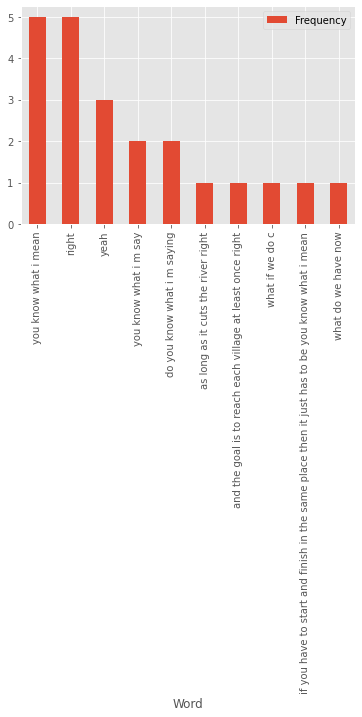

In [62]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=90, width=0.5)

In [63]:
dft = dfQr.apply(nltk.word_tokenize)
print(dft)

24           [as, long, as, it, cuts, the, river, right]
63     [and, the, goal, is, to, reach, each, village,...
129                                [what, if, we, do, c]
144                                               [yeah]
89     [if, you, have, to, start, and, finish, in, th...
                             ...                        
52     [so, going, from, g, right, here, is, the, sta...
26                                      [t, it, or, not]
75                               [is, that, more, roads]
11     [no, this, guide, goes, into, pretty, awesome,...
77     [let, s, say, how, much, it, s, gon, na, be, a...
Name: Text, Length: 69, dtype: object


In [64]:
lists =  dft
words = []
for wordList in lists:
    words += wordList
fdist = FreqDist(words)

### Unigram

In [65]:
top_N = 25
word_dist = nltk.FreqDist(fdist)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
       Word  Frequency
0        it         31
1         i         24
2        we         23
3     right         22
4       the         21
5      what         19
6        to         18
7       you         18
8         t         16
9         s         16
10       so         16
11       is         13
12     know         13
13        a         13
14     that         12
15     this         12
16      and         11
17     here         11
18       do         10
19     have         10
20     then          9
21     mean          8
22     yeah          7
23        m          7
24  because          7


<AxesSubplot:xlabel='Word'>

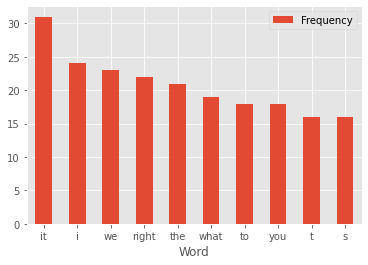

In [66]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=0, width=0.5)

### Bigram

In [67]:
word_fd = nltk.FreqDist(words)
bigram_fd = nltk.FreqDist(nltk.bigrams(words))
bigram_fd.most_common(25)

[(('what', 'i'), 14),
 (('you', 'know'), 13),
 (('know', 'what'), 13),
 (('i', 'mean'), 8),
 (('it', 's'), 8),
 (('i', 'm'), 7),
 (('don', 't'), 6),
 (('that', 's'), 6),
 (('do', 'you'), 6),
 (('has', 'to'), 5),
 (('the', 'river'), 4),
 (('have', 'to'), 4),
 (('the', 'same'), 4),
 (('t', 'it'), 4),
 (('does', 'it'), 4),
 (('we', 're'), 4),
 (('to', 'go'), 4),
 (('if', 'we'), 3),
 (('do', 'we'), 3),
 (('right', 'right'), 3),
 (('i', 'think'), 3),
 (('s', 'gon'), 3),
 (('gon', 'na'), 3),
 (('right', 'because'), 3),
 (('to', 'have'), 3)]

### Trigram

In [68]:
word_fd = nltk.FreqDist(words)
trigram_fd = nltk.FreqDist(nltk.trigrams(words))
trigram_fd.most_common(25)

[(('you', 'know', 'what'), 13),
 (('know', 'what', 'i'), 13),
 (('what', 'i', 'mean'), 8),
 (('what', 'i', 'm'), 6),
 (('do', 'you', 'know'), 5),
 (('it', 's', 'gon'), 3),
 (('s', 'gon', 'na'), 3),
 (('it', 'has', 'to'), 3),
 (('has', 'to', 'go'), 3),
 (('we', 'don', 't'), 3),
 (('don', 't', 'have'), 3),
 (('t', 'have', 'a'), 3),
 (('i', 'm', 'saying'), 3),
 (('what', 'if', 'we'), 2),
 (('has', 'to', 'be'), 2),
 (('do', 'we', 'have'), 2),
 (('it', 's', 'a'), 2),
 (('i', 'm', 'say'), 2),
 (('i', 'don', 't'), 2),
 (('don', 't', 'think'), 2),
 (('to', 'go', 'here'), 2),
 (('go', 'here', 'because'), 2),
 (('here', 'because', 'we'), 2),
 (('because', 'we', 'don'), 2),
 (('have', 'a', 'choice'), 2)]

# Check Column Ra

In [69]:
dfRa = df[df.Ra > 0]
dfRa.columns = ['E', 'P', 'Qc', 'Qi', 'Qr', 'Ra', 'Rm', 'Rd', 'S', 'J', 'N', 'C', 'Speaker', 'Text', 'Utterances', 'Unnamed']

In [70]:
print(dfRa)

     E  P  Qc  Qi  Qr  Ra  Rm  Rd  S  J  N  C Speaker  \
1    1  0   0   0   0   1   2   0  0  0  0  0       B   
2    0  0   0   0   0   3   0   0  0  0  0  0       A   
8    0  0   0   0   0   3   0   0  0  0  0  0       A   
13   0  0   0   0   0   3   0   0  0  0  0  0       A   
19   0  0   1   1   0   1   0   0  0  0  0  0       B   
..  .. ..  ..  ..  ..  ..  ..  .. .. .. .. ..     ...   
88   0  0   0   0   0   2   0   0  3  2  0  0       A   
93   0  0   0   0   0   2   0   0  3  0  0  0       A   
97   3  0   0   0   0   2   0   0  0  0  0  0       A   
109  0  0   0   0   0   3   0   0  0  3  0  0       A   
111  0  0   0   0   0   3   0   0  0  0  0  0       A   

                                                  Text Utterances Unnamed  
1                                      only one bridge        NaN     NaN  
2                                                 yeah        NaN     NaN  
8                                                 yeah        NaN     NaN  
13         

In [71]:
print(dfRa.Text)

1                                        only one bridge
2                                                   yeah
8                                                   yeah
13                                                  yeah
19                                    that was confirmed
                             ...                        
88                         yeah you never know let s see
93                            yeah yeah definitely laugh
97     yeah i let s see i was thinking this will be s...
109    yeah i feel like that yeah we could yeah here ...
111                                                 yeah
Name: Text, Length: 1539, dtype: object


In [72]:
mask = [isinstance(item, (str, bytes)) for item in dfRa.Text]
dfRa = dfRa.loc[mask]
dfRa.Text = dfRa.Text.astype(str)

In [73]:
dfRa = dfRa.Text
print(dfRa)

1                                        only one bridge
2                                                   yeah
8                                                   yeah
13                                                  yeah
19                                    that was confirmed
                             ...                        
88                         yeah you never know let s see
93                            yeah yeah definitely laugh
97     yeah i let s see i was thinking this will be s...
109    yeah i feel like that yeah we could yeah here ...
111                                                 yeah
Name: Text, Length: 908, dtype: object


In [74]:
top_N = 25
word_dist = nltk.FreqDist(dfRa)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
             Word  Frequency
0            yeah        206
1           right         57
2             hmm         56
3            okay         38
4             yes         22
5             yup         10
6              oh          8
7         alright          7
8            sure          7
9         oh yeah          5
10           cool          4
11      yeah yeah          4
12     i think so          4
13        perfect          3
14       chuckles          3
15    right right          3
16       oh i see          3
17          i see          2
18     yeah right          2
19    sounds good          2
20  yeah go ahead          2
21          great          2
22      sure yeah          2
23    finalize it          2
24    i like that          2


<AxesSubplot:xlabel='Word'>

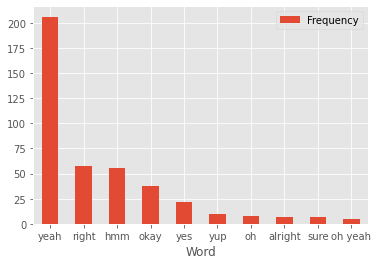

In [75]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=0, width=0.5)

In [76]:
dft = dfRa.apply(nltk.word_tokenize)
print(dft)

1                                    [only, one, bridge]
2                                                 [yeah]
8                                                 [yeah]
13                                                [yeah]
19                                [that, was, confirmed]
                             ...                        
88                 [yeah, you, never, know, let, s, see]
93                       [yeah, yeah, definitely, laugh]
97     [yeah, i, let, s, see, i, was, thinking, this,...
109    [yeah, i, feel, like, that, yeah, we, could, y...
111                                               [yeah]
Name: Text, Length: 908, dtype: object


In [77]:
lists =  dft
words = []
for wordList in lists:
    words += wordList
fdist = FreqDist(words)

### Unigram

In [78]:
top_N = 25
word_dist = nltk.FreqDist(fdist)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
     Word  Frequency
0    yeah        426
1   right        179
2       i        140
3    that        136
4       s        122
5      it        112
6      to         87
7     you         73
8    okay         71
9     the         68
10     oh         64
11  think         61
12     so         61
13     we         61
14   then         57
15    hmm         57
16   like         55
17   this         52
18      a         50
19    and         40
20     is         39
21     be         38
22   have         37
23    yes         34
24     go         33


<AxesSubplot:xlabel='Word'>

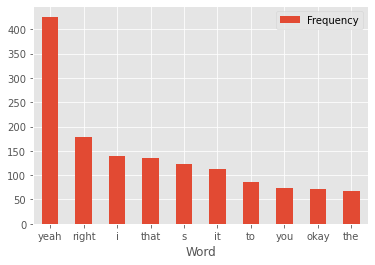

In [79]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=0, width=0.5)

### Bigram

In [80]:
word_fd = nltk.FreqDist(words)
bigram_fd = nltk.FreqDist(nltk.bigrams(words))
bigram_fd.most_common(25)

[(('yeah', 'yeah'), 125),
 (('that', 's'), 67),
 (('i', 'think'), 53),
 (('right', 'right'), 47),
 (('yeah', 'i'), 44),
 (('it', 's'), 32),
 (('right', 'yeah'), 32),
 (('have', 'to'), 30),
 (('yeah', 'that'), 28),
 (('and', 'then'), 23),
 (('yeah', 'it'), 21),
 (('hmm', 'yeah'), 20),
 (('yeah', 'okay'), 19),
 (('let', 's'), 18),
 (('yeah', 'right'), 18),
 (('i', 'see'), 17),
 (('think', 'that'), 16),
 (('you', 're'), 16),
 (('oh', 'yeah'), 14),
 (('okay', 'yeah'), 14),
 (('s', 'a'), 14),
 (('this', 'is'), 13),
 (('like', 'that'), 13),
 (('would', 'be'), 12),
 (('yeah', 'oh'), 12)]

### Trigram

In [81]:
word_fd = nltk.FreqDist(words)
trigram_fd = nltk.FreqDist(nltk.trigrams(words))
trigram_fd.most_common(25)

[(('yeah', 'yeah', 'yeah'), 45),
 (('yeah', 'i', 'think'), 25),
 (('yeah', 'that', 's'), 20),
 (('right', 'right', 'right'), 17),
 (('i', 'think', 'that'), 14),
 (('i', 'think', 'so'), 11),
 (('you', 're', 'right'), 11),
 (('yeah', 'it', 's'), 9),
 (('that', 's', 'a'), 9),
 (('that', 'makes', 'sense'), 9),
 (('yeah', 'yeah', 'i'), 8),
 (('think', 'that', 's'), 8),
 (('yeah', 'yeah', 'right'), 8),
 (('we', 'have', 'to'), 8),
 (('oh', 'i', 'see'), 8),
 (('s', 'a', 'good'), 8),
 (('that', 's', 'true'), 8),
 (('right', 'yeah', 'yeah'), 7),
 (('yeah', 'hmm', 'yeah'), 7),
 (('you', 'have', 'to'), 7),
 (('have', 'to', 'go'), 7),
 (('yeah', 'right', 'right'), 7),
 (('right', 'right', 'yeah'), 7),
 (('i', 'think', 'it'), 7),
 (('let', 's', 'see'), 7)]

# Check Column Rm

In [82]:
dfRm = df[df.Rm > 0]
dfRm.columns = ['E', 'P', 'Qc', 'Qi', 'Qr', 'Ra', 'Rm', 'Rd', 'S', 'J', 'N', 'C', 'Speaker', 'Text', 'Utterances', 'Unnamed']

In [83]:
print(dfRm)

     E  P  Qc  Qi  Qr  Ra  Rm  Rd  S  J  N  C Speaker  \
1    1  0   0   0   0   1   2   0  0  0  0  0       B   
25   2  0   0   0   0   0   1   0  0  0  0  0       A   
26   0  0   0   0   0   1   1   0  1  0  0  0       B   
27   3  0   0   0   0   0   1   0  0  3  0  0       A   
38   0  0   0   0   0   0   1   0  2  0  0  0       A   
..  .. ..  ..  ..  ..  ..  ..  .. .. .. .. ..     ...   
41   0  0   0   0   0   3   2   0  0  3  0  0       B   
50   1  0   0   2   0   0   1   0  0  3  0  0       B   
101  3  0   0   0   0   0   2   0  0  2  0  0       A   
106  3  0   0   0   0   0   2   0  0  1  0  0       B   
107  2  0   0   0   0   0   1   0  0  3  0  0       B   

                                                  Text Utterances Unnamed  
1                                      only one bridge        NaN     NaN  
25        i think it depends on where you put the base        NaN     NaN  
26                                                 NaN        NaN     NaN  
27   yeah i

In [84]:
print(dfRm.Text)

1                                        only one bridge
25          i think it depends on where you put the base
26                                                   NaN
27     yeah i mean this i think the route between f g...
38                                                  okay
                             ...                        
41     yeah this is definitely shorter but then so th...
50            and then so you say that the base would be
101    my only worry is that it s a longer road when ...
106    because if we have already the point is that i...
107    cause it s actually it seems longer from here ...
Name: Text, Length: 788, dtype: object


In [85]:
mask = [isinstance(item, (str, bytes)) for item in dfRm.Text]
dfRm = dfRm.loc[mask]
dfRm.Text = dfRm.Text.astype(str)

In [86]:
dfRm = dfRm.Text
print(dfRm)

1                                        only one bridge
25          i think it depends on where you put the base
27     yeah i mean this i think the route between f g...
38                                                  okay
41     yeah and then we can either go this way or mak...
                             ...                        
41     yeah this is definitely shorter but then so th...
50            and then so you say that the base would be
101    my only worry is that it s a longer road when ...
106    because if we have already the point is that i...
107    cause it s actually it seems longer from here ...
Name: Text, Length: 516, dtype: object


In [87]:
top_N = 25
word_dist = nltk.FreqDist(dfRm)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
                                                 Word  Frequency
0                                                 hmm          9
1                                                yeah          4
2                                                 but          3
3                                               right          3
4                                     only one bridge          1
5        i think it depends on where you put the base          1
6   yeah i mean this i think the route between f g...          1
7                                                okay          1
8   yeah and then we can either go this way or mak...          1
9   maybe we can try for example if we go like thi...          1
10                            but if this is the base          1
11  i think if this is the base this is the base m...          1
12  yes oh no if this is the base then we go like ...          1
13              yeah let s start with conferring sure          1
14       

<AxesSubplot:xlabel='Word'>

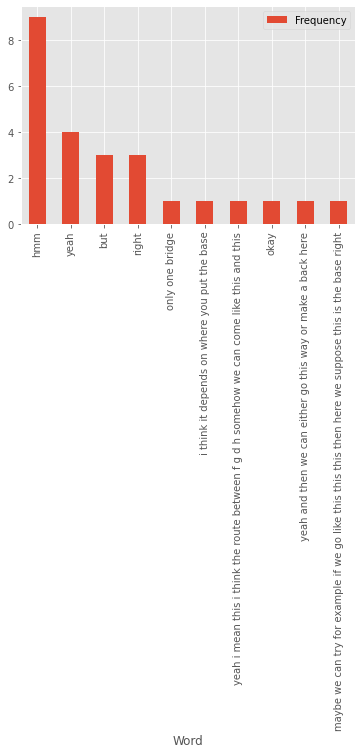

In [88]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=90, width=0.5)

In [89]:
dft = dfRm.apply(nltk.word_tokenize)
print(dft)

1                                    [only, one, bridge]
25     [i, think, it, depends, on, where, you, put, t...
27     [yeah, i, mean, this, i, think, the, route, be...
38                                                [okay]
41     [yeah, and, then, we, can, either, go, this, w...
                             ...                        
41     [yeah, this, is, definitely, shorter, but, the...
50     [and, then, so, you, say, that, the, base, wou...
101    [my, only, worry, is, that, it, s, a, longer, ...
106    [because, if, we, have, already, the, point, i...
107    [cause, it, s, actually, it, seems, longer, fr...
Name: Text, Length: 516, dtype: object


In [90]:
lists =  dft
words = []
for wordList in lists:
    words += wordList
fdist = FreqDist(words)

### Unigram

In [91]:
top_N = 25
word_dist = nltk.FreqDist(fdist)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
     Word  Frequency
0      to        226
1      we        213
2     the        160
3      it        156
4     and        148
5    then        135
6       i        134
7    this        122
8    have        107
9    here        106
10   that        105
11     go         99
12    but         96
13      s         86
14    you         82
15      a         79
16   back         76
17   yeah         75
18     is         75
19      t         73
20     if         72
21     so         72
22   like         67
23     be         66
24  think         64


<AxesSubplot:xlabel='Word'>

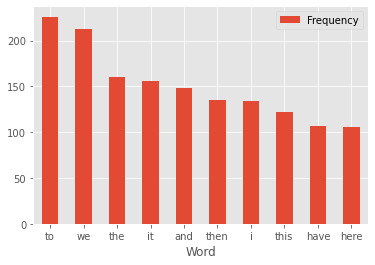

In [92]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=0, width=0.5)

### Bigram

In [93]:
word_fd = nltk.FreqDist(words)
bigram_fd = nltk.FreqDist(nltk.bigrams(words))
bigram_fd.most_common(25)

[(('and', 'then'), 73),
 (('have', 'to'), 73),
 (('it', 's'), 46),
 (('i', 'think'), 44),
 (('if', 'we'), 41),
 (('to', 'go'), 41),
 (('don', 't'), 37),
 (('we', 'can'), 33),
 (('the', 'same'), 31),
 (('this', 'is'), 25),
 (('we', 'have'), 25),
 (('go', 'back'), 23),
 (('that', 's'), 22),
 (('then', 'we'), 21),
 (('i', 'don'), 21),
 (('this', 'way'), 20),
 (('here', 'here'), 19),
 (('this', 'one'), 19),
 (('i', 'mean'), 17),
 (('like', 'this'), 17),
 (('if', 'you'), 17),
 (('to', 'be'), 16),
 (('back', 'to'), 16),
 (('to', 'c'), 15),
 (('to', 'j'), 15)]

### Trigram

In [94]:
word_fd = nltk.FreqDist(words)
trigram_fd = nltk.FreqDist(nltk.trigrams(words))
trigram_fd.most_common(25)

[(('have', 'to', 'go'), 30),
 (('i', 'don', 't'), 21),
 (('we', 'have', 'to'), 19),
 (('to', 'go', 'back'), 15),
 (('here', 'here', 'here'), 14),
 (('don', 't', 'think'), 10),
 (('d', 'have', 'to'), 10),
 (('and', 'then', 'go'), 10),
 (('you', 'have', 'to'), 9),
 (('we', 'don', 't'), 9),
 (('one', 'two', 'three'), 9),
 (('t', 'have', 'to'), 9),
 (('don', 't', 'know'), 8),
 (('if', 'we', 'started'), 8),
 (('we', 'd', 'have'), 8),
 (('all', 'the', 'way'), 8),
 (('here', 'and', 'then'), 8),
 (('two', 'three', 'four'), 8),
 (('i', 'think', 'it'), 7),
 (('and', 'then', 'we'), 7),
 (('this', 'is', 'the'), 7),
 (('have', 'to', 'come'), 7),
 (('if', 'we', 'start'), 7),
 (('the', 'way', 'back'), 7),
 (('i', 'think', 'we'), 7)]

# Check Column Rd

In [95]:
dfRd = df[df.Rd > 0]
dfRd.columns = ['E', 'P', 'Qc', 'Qi', 'Qr', 'Ra', 'Rm', 'Rd', 'S', 'J', 'N', 'C', 'Speaker', 'Text', 'Utterances', 'Unnamed']

In [96]:
print(dfRd)

       E   P  Qc  Qi  Qr   Ra  Rm  Rd   S   J  N  C Speaker  \
51     2   0   0   0   0    0   0   1   0   0  0  0       A   
84     0   0   0   0   0    0   1   2   0   0  0  0       A   
99     0   0   0   0   0    0   0   3   0   0  0  0       B   
168    0   0   0   0   0    0   0   3   0   0  0  0       A   
183    2   0   0   0   0    0   0   3   0   0  0  0       B   
60     1   0   0   0   0    0   0   1   1   0  0  0       A   
72     3   0   0   0   0    0   0   1   0   0  0  0       B   
109    2   0   0   0   0    0   0   1   0   0  0  0       A   
132    2   0   0   0   0    0   0   1   0   0  0  0       B   
139    0   0   3   0   0    0   0   1   0   0  0  0       A   
53     0   0   0   0   0    0   1   2   0   0  0  0       B   
111    2   0   0   0   0    0   0   1   0   1  0  0       A   
112    0   0   0   0   0    0   0   1   2   0  0  0       B   
113    0   0   0   0   0    0   0   1   2   0  0  0       B   
116  127  55  21  14   0  110  32   3  50  82  5  0    

In [97]:
print(dfRd.Text)

51              i am not sure if that is the shorter one
84                                       well not really
99                                                    no
168                                         no that s it
183                                          no we can t
60                                                 oh no
72                                              but then
109                                                  NaN
132                                                   no
139       would it matter i don t see it would be matter
53                                                   NaN
111    but yeah if you take that into account then yo...
112                                                  hmm
113                                                  hmm
116    session ends video continues for a few more se...
61                                       then oh hold on
24                right but there can only be one bridge
49     i don t think a has to b

In [98]:
mask = [isinstance(item, (str, bytes)) for item in dfRd.Text]
dfRd = dfRd.loc[mask]
dfRd.Text = dfRd.Text.astype(str)

In [99]:
dfRd = dfRd.Text
print(dfRd)

51              i am not sure if that is the shorter one
84                                       well not really
99                                                    no
168                                         no that s it
183                                          no we can t
60                                                 oh no
72                                              but then
132                                                   no
139       would it matter i don t see it would be matter
111    but yeah if you take that into account then yo...
112                                                  hmm
113                                                  hmm
116    session ends video continues for a few more se...
61                                       then oh hold on
24                right but there can only be one bridge
49     i don t think a has to be whatever i don t thi...
122                                     no we do need it
54                             

In [100]:
top_N = 25
word_dist = nltk.FreqDist(dfRd)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
                                                 Word  Frequency
0                                                  no          2
1                                                 hmm          2
2                                                 but          2
3            i am not sure if that is the shorter one          1
4                                     well not really          1
5                                        no that s it          1
6                                         no we can t          1
7                                               oh no          1
8                                            but then          1
9      would it matter i don t see it would be matter          1
10  but yeah if you take that into account then yo...          1
11  session ends video continues for a few more se...          1
12                                    then oh hold on          1
13             right but there can only be one bridge          1
14  i don

<AxesSubplot:xlabel='Word'>

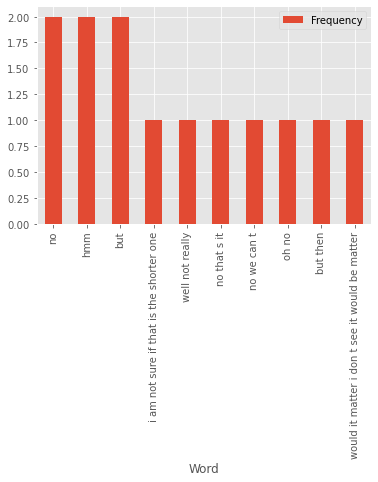

In [101]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=90, width=0.5)

In [102]:
dft = dfRd.apply(nltk.word_tokenize)
print(dft)

51     [i, am, not, sure, if, that, is, the, shorter,...
84                                   [well, not, really]
99                                                  [no]
168                                    [no, that, s, it]
183                                     [no, we, can, t]
60                                              [oh, no]
72                                           [but, then]
132                                                 [no]
139    [would, it, matter, i, don, t, see, it, would,...
111    [but, yeah, if, you, take, that, into, account...
112                                                [hmm]
113                                                [hmm]
116    [session, ends, video, continues, for, a, few,...
61                                  [then, oh, hold, on]
24       [right, but, there, can, only, be, one, bridge]
49     [i, don, t, think, a, has, to, be, whatever, i...
122                               [no, we, do, need, it]
54                             

In [103]:
lists =  dft
words = []
for wordList in lists:
    words += wordList
fdist = FreqDist(words)

### Unigram

In [104]:
top_N = 25
word_dist = nltk.FreqDist(fdist)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
     Word  Frequency
0      it         12
1       i         10
2      no         10
3    that          9
4       s          9
5       t          9
6      to          9
7     but          7
8     don          7
9   think          7
10   have          6
11   then          5
12    one          4
13     be          4
14      a          4
15     is          3
16    the          3
17   well          3
18     we          3
19    can          3
20   yeah          3
21    you          3
22   does          3
23    not          2
24     if          2


<AxesSubplot:xlabel='Word'>

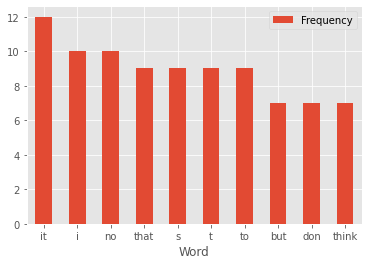

In [105]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=0, width=0.5)

### Bigram

In [106]:
word_fd = nltk.FreqDist(words)
bigram_fd = nltk.FreqDist(nltk.bigrams(words))
bigram_fd.most_common(25)

[(('don', 't'), 7),
 (('i', 'don'), 6),
 (('that', 's'), 5),
 (('t', 'think'), 5),
 (('have', 'to'), 4),
 (('to', 'have'), 3),
 (('no', 'that'), 2),
 (('no', 'we'), 2),
 (('no', 'but'), 2),
 (('but', 'then'), 2),
 (('is', 'better'), 2),
 (('hold', 'on'), 2),
 (('has', 'to'), 2),
 (('to', 'be'), 2),
 (('think', 'it'), 2),
 (('it', 's'), 2),
 (('but', 'no'), 2),
 (('yeah', 'that'), 2),
 (('i', 'mean'), 2),
 (('a', 'hub'), 2),
 (('does', 'it'), 2),
 (('it', 'does'), 2),
 (('i', 'am'), 1),
 (('am', 'not'), 1),
 (('not', 'sure'), 1)]

### Trigram

In [107]:
word_fd = nltk.FreqDist(words)
trigram_fd = nltk.FreqDist(nltk.trigrams(words))
trigram_fd.most_common(25)

[(('i', 'don', 't'), 6),
 (('don', 't', 'think'), 5),
 (('no', 'that', 's'), 2),
 (('have', 'to', 'have'), 2),
 (('has', 'to', 'be'), 2),
 (('t', 'think', 'it'), 2),
 (('i', 'am', 'not'), 1),
 (('am', 'not', 'sure'), 1),
 (('not', 'sure', 'if'), 1),
 (('sure', 'if', 'that'), 1),
 (('if', 'that', 'is'), 1),
 (('that', 'is', 'the'), 1),
 (('is', 'the', 'shorter'), 1),
 (('the', 'shorter', 'one'), 1),
 (('shorter', 'one', 'well'), 1),
 (('one', 'well', 'not'), 1),
 (('well', 'not', 'really'), 1),
 (('not', 'really', 'no'), 1),
 (('really', 'no', 'no'), 1),
 (('no', 'no', 'that'), 1),
 (('that', 's', 'it'), 1),
 (('s', 'it', 'no'), 1),
 (('it', 'no', 'we'), 1),
 (('no', 'we', 'can'), 1),
 (('we', 'can', 't'), 1)]

# Check Column S

In [108]:
dfS = df[df.S > 0]
dfS.columns = ['E', 'P', 'Qc', 'Qi', 'Qr', 'Ra', 'Rm', 'Rd', 'S', 'J', 'N', 'C', 'Speaker', 'Text', 'Utterances', 'Unnamed']

In [109]:
print(dfS)

     E  P  Qc  Qi  Qr  Ra  Rm  Rd  S  J  N  C Speaker  \
26   0  0   0   0   0   1   1   0  1  0  0  0       B   
34   3  0   0   0   0   0   0   0  1  0  0  0       A   
38   0  0   0   0   0   0   1   0  2  0  0  0       A   
40   0  0   0   0   0   2   0   0  1  0  0  0       B   
47   0  0   0   0   0   2   0   0  1  0  1  0       B   
..  .. ..  ..  ..  ..  ..  ..  .. .. .. .. ..     ...   
110  2  0   3   0   0   0   0   0  3  0  0  0       B   
112  0  0   0   0   0   0   0   0  3  0  0  0       B   
113  0  1   0   0   0   0   0   0  3  0  0  0       B   
115  3  0   0   0   0   0   0   0  3  0  0  0       B   
116  0  0   0   0   0   0   0   0  3  0  0  2       B   

                                                  Text Utterances Unnamed  
26                                                 NaN        NaN     NaN  
34   that was my idea but i am not sure if that s t...        NaN     NaN  
38                                                okay        NaN     NaN  
40         

In [110]:
print(dfS.Text)

26                                                   NaN
34     that was my idea but i am not sure if that s t...
38                                                  okay
40                                                   yes
47                                                   yes
                             ...                        
110    are you sure i want to make sure that it s i a...
112                                            okay well
113        okay i guess you can do that cause scary part
115    i m kind of messy with that i love drawing but...
116    that s smart okay i like it it looks like a do...
Name: Text, Length: 1242, dtype: object


In [111]:
mask = [isinstance(item, (str, bytes)) for item in dfS.Text]
dfS = dfS.loc[mask]
dfS.Text = dfS.Text.astype(str)

In [112]:
dfS = dfS.Text
print(dfS)

34     that was my idea but i am not sure if that s t...
38                                                  okay
40                                                   yes
47                                                   yes
49                                                 twice
                             ...                        
110    are you sure i want to make sure that it s i a...
112                                            okay well
113        okay i guess you can do that cause scary part
115    i m kind of messy with that i love drawing but...
116    that s smart okay i like it it looks like a do...
Name: Text, Length: 725, dtype: object


In [113]:
top_N = 25
word_dist = nltk.FreqDist(dfS)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
                    Word  Frequency
0                   yeah         74
1                    hmm         57
2               chuckles         57
3                   okay         27
4                     oh         17
5                  right         15
6                     so         14
7                alright         11
8                    yup          6
9                   cool          6
10                 laugh          6
11                   yes          4
12               perfect          4
13             let s see          3
14                 great          3
15                  sure          3
16  you know what i mean          3
17                laughs          3
18                    um          3
19         yeah chuckles          3
20                 sweet          3
21            let me see          2
22                 i see          2
23                 sorry          2
24             thank you          2


<AxesSubplot:xlabel='Word'>

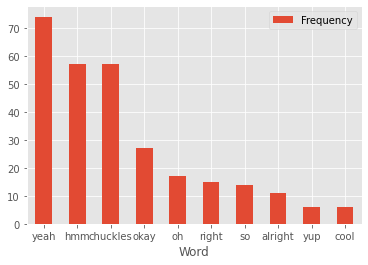

In [114]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=0, width=0.5)

In [115]:
dft = dfS.apply(nltk.word_tokenize)
print(dft)

34     [that, was, my, idea, but, i, am, not, sure, i...
38                                                [okay]
40                                                 [yes]
47                                                 [yes]
49                                               [twice]
                             ...                        
110    [are, you, sure, i, want, to, make, sure, that...
112                                         [okay, well]
113    [okay, i, guess, you, can, do, that, cause, sc...
115    [i, m, kind, of, messy, with, that, i, love, d...
116    [that, s, smart, okay, i, like, it, it, looks,...
Name: Text, Length: 725, dtype: object


In [116]:
lists =  dft
words = []
for wordList in lists:
    words += wordList
fdist = FreqDist(words)

### Unigram

In [117]:
top_N = 25
word_dist = nltk.FreqDist(fdist)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
        Word  Frequency
0          i        157
1       yeah        143
2   chuckles        114
3          s         98
4       that         92
5         it         90
6         so         71
7        the         61
8        you         60
9         to         60
10     right         59
11       hmm         59
12        oh         58
13      okay         57
14        we         54
15         a         51
16      like         47
17       and         42
18      this         38
19         t         35
20     think         34
21        is         33
22      then         31
23      here         29
24     laugh         27


<AxesSubplot:xlabel='Word'>

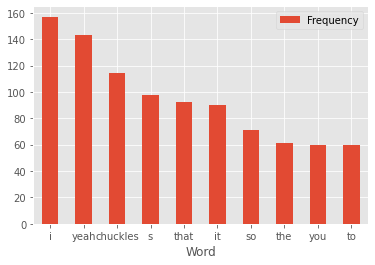

In [118]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=0, width=0.5)

### Bigram

In [119]:
word_fd = nltk.FreqDist(words)
bigram_fd = nltk.FreqDist(nltk.bigrams(words))
bigram_fd.most_common(25)

[(('that', 's'), 39),
 (('it', 's'), 34),
 (('yeah', 'yeah'), 28),
 (('chuckles', 'chuckles'), 25),
 (('i', 'm'), 25),
 (('i', 'think'), 24),
 (('don', 't'), 22),
 (('i', 'don'), 19),
 (('t', 'know'), 16),
 (('chuckles', 'i'), 15),
 (('let', 's'), 14),
 (('yeah', 'i'), 12),
 (('this', 'is'), 12),
 (('and', 'then'), 12),
 (('chuckles', 'yeah'), 12),
 (('s', 'a'), 11),
 (('yeah', 'chuckles'), 11),
 (('oh', 'i'), 11),
 (('i', 'see'), 10),
 (('s', 'see'), 10),
 (('hmm', 'hmm'), 10),
 (('hmm', 'yeah'), 10),
 (('you', 're'), 9),
 (('so', 'yeah'), 9),
 (('what', 'i'), 9)]

### Trigram

In [120]:
word_fd = nltk.FreqDist(words)
trigram_fd = nltk.FreqDist(nltk.trigrams(words))
trigram_fd.most_common(25)

[(('i', 'don', 't'), 19),
 (('don', 't', 'know'), 15),
 (('let', 's', 'see'), 10),
 (('i', 'think', 'we'), 9),
 (('yeah', 'yeah', 'yeah'), 8),
 (('i', 'think', 'that'), 7),
 (('yeah', 'it', 's'), 7),
 (('yeah', 'i', 'think'), 6),
 (('chuckles', 'i', 'don'), 6),
 (('oh', 'i', 'see'), 6),
 (('you', 'know', 'what'), 6),
 (('know', 'what', 'i'), 6),
 (('that', 's', 'a'), 6),
 (('that', 's', 'the'), 5),
 (('yeah', 'that', 's'), 5),
 (('looks', 'like', 'a'), 5),
 (('s', 'a', 'good'), 5),
 (('chuckles', 'chuckles', 'chuckles'), 4),
 (('it', 'looks', 'like'), 4),
 (('yeah', 'chuckles', 'yeah'), 4),
 (('what', 'i', 'm'), 4),
 (('the', 'other', 'way'), 4),
 (('a', 'good', 'idea'), 4),
 (('that', 'makes', 'sense'), 4),
 (('i', 'would', 'have'), 4)]

# Check Column J

In [121]:
dfJ = df[df.J > 0]
dfJ.columns = ['E', 'P', 'Qc', 'Qi', 'Qr', 'Ra', 'Rm', 'Rd', 'S', 'J', 'N', 'C', 'Speaker', 'Text', 'Utterances', 'Unnamed']

In [122]:
print(dfJ)

     E  P  Qc  Qi  Qr  Ra  Rm  Rd  S  J  N  C Speaker  \
3    2  1   0   0   0   0   0   0  0  3  0  0       B   
4    2  1   0   0   0   0   0   0  0  3  1  0       A   
5    3  0   0   0   0   0   0   0  0  3  0  0       B   
6    3  1   0   0   0   0   0   0  0  3  1  0       A   
7    2  0   0   0   0   0   0   0  0  3  0  0       B   
..  .. ..  ..  ..  ..  ..  ..  .. .. .. .. ..     ...   
99   3  3   0   1   0   0   0   0  0  2  0  0       B   
101  3  0   0   0   0   0   2   0  0  2  0  0       A   
106  3  0   0   0   0   0   2   0  0  1  0  0       B   
107  2  0   0   0   0   0   1   0  0  3  0  0       B   
109  0  0   0   0   0   3   0   0  0  3  0  0       A   

                                                  Text Utterances Unnamed  
3                          can we say if we cross here        NaN     NaN  
4                           and then connect to b or e        NaN     NaN  
5                         and then comes back this way        NaN     NaN  
6    yeah o

In [123]:
print(dfJ.Text)

3                            can we say if we cross here
4                             and then connect to b or e
5                           and then comes back this way
6      yeah or what i am thinking is can it connect t...
7                                                one two
                             ...                        
99     do you see what i am saying instead of connect...
101    my only worry is that it s a longer road when ...
106    because if we have already the point is that i...
107    cause it s actually it seems longer from here ...
109    yeah i feel like that yeah we could yeah here ...
Name: Text, Length: 1713, dtype: object


In [124]:
mask = [isinstance(item, (str, bytes)) for item in dfJ.Text]
dfJ = dfJ.loc[mask]
dfJ.Text = dfJ.Text.astype(str)

In [125]:
dfJ = dfJ.Text
print(dfJ)

3                            can we say if we cross here
4                             and then connect to b or e
5                           and then comes back this way
6      yeah or what i am thinking is can it connect t...
7                                                one two
                             ...                        
99     do you see what i am saying instead of connect...
101    my only worry is that it s a longer road when ...
106    because if we have already the point is that i...
107    cause it s actually it seems longer from here ...
109    yeah i feel like that yeah we could yeah here ...
Name: Text, Length: 1206, dtype: object


In [126]:
top_N = 25
word_dist = nltk.FreqDist(dfJ)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
                           Word  Frequency
0                           hmm          9
1                            so          7
2                      and then          7
3                          yeah          7
4                     let s see          6
5                          okay          6
6                       one two          5
7                          here          5
8                          this          5
9                         three          4
10                    like that          4
11                     chuckles          4
12                          and          3
13                            j          3
14                           oh          3
15                            c          3
16             this one i guess          2
17                     this one          2
18                        there          2
19                    like this          2
20                        draws          2
21                      do that       

<AxesSubplot:xlabel='Word'>

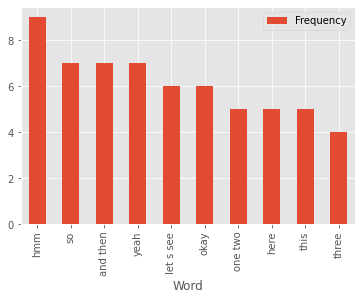

In [127]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=90, width=0.5)

In [128]:
dft = dfJ.apply(nltk.word_tokenize)
print(dft)

3                    [can, we, say, if, we, cross, here]
4                     [and, then, connect, to, b, or, e]
5                    [and, then, comes, back, this, way]
6      [yeah, or, what, i, am, thinking, is, can, it,...
7                                             [one, two]
                             ...                        
99     [do, you, see, what, i, am, saying, instead, o...
101    [my, only, worry, is, that, it, s, a, longer, ...
106    [because, if, we, have, already, the, point, i...
107    [cause, it, s, actually, it, seems, longer, fr...
109    [yeah, i, feel, like, that, yeah, we, could, y...
Name: Text, Length: 1206, dtype: object


In [129]:
lists =  dft
words = []
for wordList in lists:
    words += wordList
fdist = FreqDist(words)

### Unigram

In [130]:
top_N = 25
word_dist = nltk.FreqDist(fdist)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
     Word  Frequency
0      to        531
1    this        470
2      we        457
3     and        430
4    here        396
5    then        357
6     the        345
7      so        330
8      it        302
9      go        279
10   like        275
11      i        272
12   that        261
13      s        213
14      a        197
15    you        196
16     is        188
17     if        186
18    one        171
19   have        166
20    way        162
21   back        158
22  right        116
23    can        114
24      b        114


<AxesSubplot:xlabel='Word'>

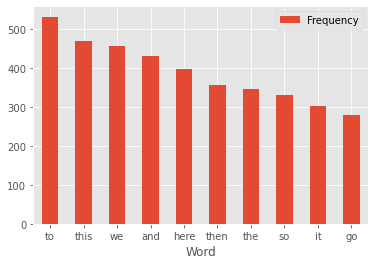

In [131]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=0, width=0.5)

### Bigram

In [132]:
word_fd = nltk.FreqDist(words)
bigram_fd = nltk.FreqDist(nltk.bigrams(words))
bigram_fd.most_common(25)

[(('and', 'then'), 201),
 (('have', 'to'), 103),
 (('if', 'we'), 94),
 (('to', 'go'), 93),
 (('this', 'way'), 85),
 (('it', 's'), 81),
 (('like', 'this'), 74),
 (('here', 'and'), 64),
 (('this', 'is'), 63),
 (('we', 'can'), 61),
 (('here', 'here'), 60),
 (('this', 'one'), 56),
 (('so', 'we'), 55),
 (('that', 's'), 52),
 (('i', 'think'), 49),
 (('then', 'we'), 48),
 (('let', 's'), 47),
 (('we', 'have'), 43),
 (('don', 't'), 43),
 (('go', 'back'), 37),
 (('one', 'two'), 36),
 (('i', 'mean'), 36),
 (('to', 'b'), 35),
 (('would', 'be'), 35),
 (('the', 'base'), 34)]

### Trigram

In [133]:
word_fd = nltk.FreqDist(words)
trigram_fd = nltk.FreqDist(nltk.trigrams(words))
trigram_fd.most_common(25)

[(('have', 'to', 'go'), 37),
 (('here', 'here', 'here'), 35),
 (('here', 'and', 'then'), 31),
 (('one', 'two', 'three'), 30),
 (('two', 'three', 'four'), 27),
 (('let', 's', 'see'), 25),
 (('go', 'this', 'way'), 24),
 (('we', 'have', 'to'), 24),
 (('to', 'go', 'back'), 24),
 (('go', 'like', 'this'), 22),
 (('three', 'four', 'five'), 22),
 (('i', 'don', 't'), 20),
 (('four', 'five', 'six'), 20),
 (('don', 't', 'know'), 19),
 (('like', 'this', 'and'), 18),
 (('and', 'then', 'we'), 17),
 (('five', 'six', 'seven'), 17),
 (('six', 'seven', 'eight'), 16),
 (('seven', 'eight', 'nine'), 15),
 (('we', 'don', 't'), 15),
 (('if', 'we', 'go'), 14),
 (('is', 'the', 'base'), 14),
 (('it', 'would', 'be'), 14),
 (('all', 'the', 'way'), 14),
 (('eight', 'nine', 'ten'), 14)]

# Check Column N

In [134]:
dfN = df[df.N > 0]
dfN.columns = ['E', 'P', 'Qc', 'Qi', 'Qr', 'Ra', 'Rm', 'Rd', 'S', 'J', 'N', 'C', 'Speaker', 'Text', 'Utterances', 'Unnamed']

In [135]:
print(dfN)

    E  P  Qc  Qi  Qr  Ra  Rm  Rd  S  J  N  C Speaker  \
4   2  1   0   0   0   0   0   0  0  3  1  0       A   
6   3  1   0   0   0   0   0   0  0  3  1  0       A   
47  0  0   0   0   0   2   0   0  1  0  1  0       B   
49  0  0   0   0   0   3   0   0  1  0  1  0       B   
79  3  0   0   0   0   0   0   0  0  0  3  0       B   
.. .. ..  ..  ..  ..  ..  ..  .. .. .. .. ..     ...   
71  3  0   0   0   0   0   0   0  2  0  2  0       B   
73  1  0   0   0   0   3   0   0  1  2  1  1       B   
78  1  0   0   0   0   3   0   0  1  1  2  0       A   
79  3  0   0   0   0   0   0   0  0  2  2  0       B   
83  0  0   0   0   0   3   0   0  0  0  2  0       B   

                                                 Text Utterances Unnamed  
4                          and then connect to b or e        NaN     NaN  
6   yeah or what i am thinking is can it connect t...        NaN     NaN  
47                                                yes        NaN     NaN  
49                         

In [136]:
print(dfN.Text)

4                            and then connect to b or e
6     yeah or what i am thinking is can it connect t...
47                                                  yes
49                                                twice
79                             all we have to come back
                            ...                        
71              i don t disagree with you but i kind of
73        oh yeah definitely that s that s my let s see
78                yeah that s the that s the weird part
79    there s no point because then if this is right...
83                                    right right right
Name: Text, Length: 252, dtype: object


In [137]:
mask = [isinstance(item, (str, bytes)) for item in dfN.Text]
dfN = dfN.loc[mask]
dfN.Text = dfN.Text.astype(str)

In [138]:
dfN = dfN.Text
print(dfN)

4                            and then connect to b or e
6     yeah or what i am thinking is can it connect t...
47                                                  yes
49                                                twice
79                             all we have to come back
                            ...                        
71              i don t disagree with you but i kind of
73        oh yeah definitely that s that s my let s see
78                yeah that s the that s the weird part
79    there s no point because then if this is right...
83                                    right right right
Name: Text, Length: 150, dtype: object


In [139]:
top_N = 25
word_dist = nltk.FreqDist(dfN)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
                                                 Word  Frequency
0                                                yeah          5
1                                                 hmm          2
2                          and then connect to b or e          1
3   yeah or what i am thinking is can it connect t...          1
4                                                 yes          1
5                                               twice          1
6                            all we have to come back          1
7   maybe a is slightly shorter yeah slightly shorter          1
8                  connecting routes what do you mean          1
9                                             j and f          1
10                                         and then h          1
11                      i think that s more efficient          1
12                              what do you mean loop          1
13                            i don t think so but if          1
14  cause

<AxesSubplot:xlabel='Word'>

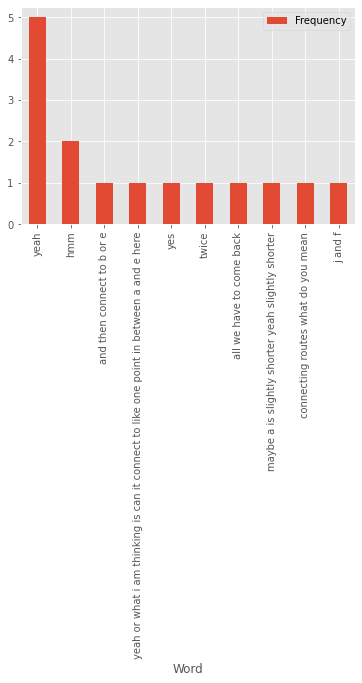

In [140]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=90, width=0.5)

In [141]:
dft = dfN.apply(nltk.word_tokenize)
print(dft)

4                    [and, then, connect, to, b, or, e]
6     [yeah, or, what, i, am, thinking, is, can, it,...
47                                                [yes]
49                                              [twice]
79                      [all, we, have, to, come, back]
                            ...                        
71    [i, don, t, disagree, with, you, but, i, kind,...
73    [oh, yeah, definitely, that, s, that, s, my, l...
78      [yeah, that, s, the, that, s, the, weird, part]
79    [there, s, no, point, because, then, if, this,...
83                                [right, right, right]
Name: Text, Length: 150, dtype: object


In [142]:
lists =  dft
words = []
for wordList in lists:
    words += wordList
fdist = FreqDist(words)

### Unigram

In [143]:
top_N = 25
word_dist = nltk.FreqDist(fdist)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
     Word  Frequency
0      to         44
1     the         43
2     and         40
3      it         39
4    that         38
5      we         37
6       s         37
7       i         33
8    yeah         28
9     you         27
10   this         27
11   then         26
12      a         25
13  right         22
14   have         20
15    one         19
16     so         18
17     if         16
18   here         15
19   like         14
20   back         14
21     be         14
22     go         14
23     is         13
24    can         13


<AxesSubplot:xlabel='Word'>

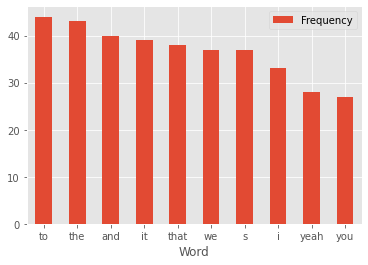

In [144]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=0, width=0.5)

### Bigram

In [145]:
word_fd = nltk.FreqDist(words)
bigram_fd = nltk.FreqDist(nltk.bigrams(words))
bigram_fd.most_common(25)

[(('that', 's'), 18),
 (('have', 'to'), 16),
 (('and', 'then'), 15),
 (('it', 's'), 13),
 (('if', 'we'), 9),
 (('don', 't'), 7),
 (('we', 'can'), 7),
 (('i', 'mean'), 7),
 (('yeah', 'i'), 6),
 (('this', 'way'), 6),
 (('would', 'be'), 6),
 (('to', 'go'), 6),
 (('as', 'the'), 6),
 (('that', 'would'), 5),
 (('one', 'two'), 5),
 (('two', 'three'), 5),
 (('three', 'four'), 5),
 (('this', 'is'), 5),
 (('you', 'have'), 5),
 (('go', 'back'), 5),
 (('i', 'think'), 4),
 (('think', 'that'), 4),
 (('i', 'don'), 4),
 (('s', 'a'), 4),
 (('then', 'we'), 4)]

### Trigram

In [146]:
word_fd = nltk.FreqDist(words)
trigram_fd = nltk.FreqDist(nltk.trigrams(words))
trigram_fd.most_common(25)

[(('one', 'two', 'three'), 5),
 (('you', 'have', 'to'), 5),
 (('have', 'to', 'go'), 5),
 (('i', 'think', 'that'), 4),
 (('i', 'don', 't'), 4),
 (('two', 'three', 'four'), 4),
 (('to', 'go', 'back'), 4),
 (('think', 'that', 's'), 3),
 (('that', 's', 'the'), 3),
 (('that', 'would', 'be'), 3),
 (('three', 'four', 'five'), 3),
 (('and', 'then', 'go'), 3),
 (('and', 'three', 'quarters'), 3),
 (('d', 'have', 'to'), 3),
 (('what', 'do', 'you'), 2),
 (('do', 'you', 'mean'), 2),
 (('don', 't', 'think'), 2),
 (('cause', 'it', 's'), 2),
 (('it', 's', 'a'), 2),
 (('and', 'then', 'we'), 2),
 (('the', 'bridge', 'and'), 2),
 (('if', 'we', 'had'), 2),
 (('would', 'be', 'but'), 2),
 (('can', 'only', 'cross'), 2),
 (('only', 'cross', 'the'), 2)]

# Check Column C

In [147]:
dfC = df[df.C > 0]
dfC.columns = ['E', 'P', 'Qc', 'Qi', 'Qr', 'Ra', 'Rm', 'Rd', 'S', 'J', 'N', 'C', 'Speaker', 'Text', 'Utterances', 'Unnamed']

In [148]:
print(dfC)

     E  P  Qc  Qi  Qr  Ra  Rm  Rd  S  J  N  C Speaker  \
22   3  0   0   0   0   0   0   0  1  0  0  2       B   
104  1  0   0   0   0   0   2   0  0  3  0  1       A   
108  2  0   0   0   0   0   1   0  0  3  0  1       B   
164  0  0   3   0   0   0   0   0  0  0  0  2       B   
47   0  0   0   3   0   0   0   0  0  1  1  1       B   
53   1  1   0   0   0   0   0   0  0  3  0  1       A   
17   2  1   0   0   0   0   0   0  0  1  0  1       B   
20   1  2   1   0   0   0   0   0  0  0  0  1       A   
49   3  2   0   0   1   0   0   0  0  1  0  1       B   
86   3  0   0   0   0   0   0   0  0  0  0  1       A   
88   3  0   0   0   0   0   0   0  0  1  0  1       A   
89   1  3   2   0   0   0   0   0  0  0  0  1       A   
93   1  1   0   0   0   0   2   0  0  0  0  1       B   
101  3  0   0   0   0   0   0   0  0  1  0  1       A   
117  0  0   2   0   1   0   0   0  0  0  0  1       B   
39   3  0   1   0   0   0   0   0  0  0  0  1       A   
46   1  0   0   0   0   0   0  

In [149]:
print(dfC.Text)

22     so the bridge situation here is annoying now c...
104                                   that one works out
108    hold on if we did if we started here no if we ...
164         i m just wondering now what would be shorter
47                                   so this is our base
53                                 okay so starting here
17     let s see i m also i m pretty sure you had to ...
20     should we sort of try doing bits of it and the...
49     i think we should also consider the mountains ...
86                  if we got the supply route coming in
88     cause if right i am starting to get an idea on...
89     then actually putting a road here would mean t...
93     although a and e should still be separated but...
101    so that s sure that it s going now if we going...
117    so route wise how is there any way we can mini...
39     i am just wondering whether the starting point...
46                                                 roads
27     my first question is whe

In [150]:
mask = [isinstance(item, (str, bytes)) for item in dfC.Text]
dfC = dfC.loc[mask]
dfC.Text = dfC.Text.astype(str)

In [151]:
dfC = dfC.Text
print(dfC)

22     so the bridge situation here is annoying now c...
104                                   that one works out
108    hold on if we did if we started here no if we ...
164         i m just wondering now what would be shorter
47                                   so this is our base
53                                 okay so starting here
17     let s see i m also i m pretty sure you had to ...
20     should we sort of try doing bits of it and the...
49     i think we should also consider the mountains ...
86                  if we got the supply route coming in
88     cause if right i am starting to get an idea on...
89     then actually putting a road here would mean t...
93     although a and e should still be separated but...
101    so that s sure that it s going now if we going...
117    so route wise how is there any way we can mini...
39     i am just wondering whether the starting point...
46                                                 roads
27     my first question is whe

In [152]:
top_N = 25
word_dist = nltk.FreqDist(dfC)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
                                                 Word  Frequency
0   so the bridge situation here is annoying now c...          1
1                                  that one works out          1
2   hold on if we did if we started here no if we ...          1
3        i m just wondering now what would be shorter          1
4                                 so this is our base          1
5                               okay so starting here          1
6   let s see i m also i m pretty sure you had to ...          1
7   should we sort of try doing bits of it and the...          1
8   i think we should also consider the mountains ...          1
9                if we got the supply route coming in          1
10  cause if right i am starting to get an idea on...          1
11  then actually putting a road here would mean t...          1
12  although a and e should still be separated but...          1
13  so that s sure that it s going now if we going...          1
14  so ro

<AxesSubplot:xlabel='Word'>

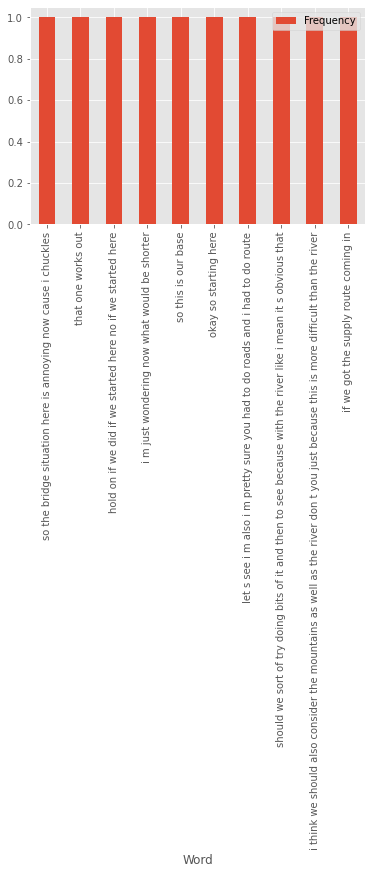

In [153]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=90, width=0.5)

In [154]:
dft = dfC.apply(nltk.word_tokenize)
print(dft)

22     [so, the, bridge, situation, here, is, annoyin...
104                              [that, one, works, out]
108    [hold, on, if, we, did, if, we, started, here,...
164    [i, m, just, wondering, now, what, would, be, ...
47                             [so, this, is, our, base]
53                            [okay, so, starting, here]
17     [let, s, see, i, m, also, i, m, pretty, sure, ...
20     [should, we, sort, of, try, doing, bits, of, i...
49     [i, think, we, should, also, consider, the, mo...
86         [if, we, got, the, supply, route, coming, in]
88     [cause, if, right, i, am, starting, to, get, a...
89     [then, actually, putting, a, road, here, would...
93     [although, a, and, e, should, still, be, separ...
101    [so, that, s, sure, that, it, s, going, now, i...
117    [so, route, wise, how, is, there, any, way, we...
39     [i, am, just, wondering, whether, the, startin...
46                                               [roads]
27     [my, first, question, is

In [155]:
lists =  dft
words = []
for wordList in lists:
    words += wordList
fdist = FreqDist(words)

### Unigram

In [156]:
top_N = 25
word_dist = nltk.FreqDist(fdist)
print('All frequencies')
print('='*35)
rslt=pd.DataFrame(word_dist.most_common(top_N),columns=['Word','Frequency'])
print(rslt)

All frequencies
        Word  Frequency
0         we         12
1        the         11
2         is         11
3       that         11
4         it         11
5          i         10
6         to         10
7          s          9
8       here          7
9         if          7
10      this          7
11        so          6
12       and          5
13         a          5
14      just          4
15      then          4
16     going          4
17        go          4
18    around          4
19       now          3
20     cause          3
21         m          3
22   shorter          3
23      okay          3
24  starting          3


<AxesSubplot:xlabel='Word'>

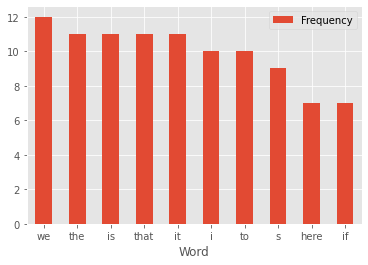

In [157]:
t_N = 10
r = pd.DataFrame(word_dist.most_common(t_N),
                    columns=['Word', 'Frequency']).set_index('Word')
matplotlib.style.use('ggplot')
r.plot.bar(rot=0, width=0.5)

### Bigram

In [158]:
word_fd = nltk.FreqDist(words)
bigram_fd = nltk.FreqDist(nltk.bigrams(words))
bigram_fd.most_common(25)

[(('if', 'we'), 6),
 (('go', 'around'), 4),
 (('that', 's'), 4),
 (('i', 'm'), 3),
 (('this', 'is'), 3),
 (('the', 'river'), 3),
 (('it', 's'), 3),
 (('is', 'that'), 3),
 (('here', 'is'), 2),
 (('we', 'started'), 2),
 (('started', 'here'), 2),
 (('just', 'wondering'), 2),
 (('let', 's'), 2),
 (('s', 'see'), 2),
 (('had', 'to'), 2),
 (('to', 'do'), 2),
 (('sort', 'of'), 2),
 (('and', 'then'), 2),
 (('the', 'mountains'), 2),
 (('cause', 'if'), 2),
 (('i', 'am'), 2),
 (('to', 'get'), 2),
 (('going', 'to'), 2),
 (('have', 'to'), 2),
 (('to', 'come'), 2)]

### Trigram

In [159]:
word_fd = nltk.FreqDist(words)
trigram_fd = nltk.FreqDist(nltk.trigrams(words))
trigram_fd.most_common(25)

[(('if', 'we', 'started'), 2),
 (('we', 'started', 'here'), 2),
 (('let', 's', 'see'), 2),
 (('had', 'to', 'do'), 2),
 (('to', 'come', 'back'), 2),
 (('go', 'around', 'this'), 2),
 (('so', 'the', 'bridge'), 1),
 (('the', 'bridge', 'situation'), 1),
 (('bridge', 'situation', 'here'), 1),
 (('situation', 'here', 'is'), 1),
 (('here', 'is', 'annoying'), 1),
 (('is', 'annoying', 'now'), 1),
 (('annoying', 'now', 'cause'), 1),
 (('now', 'cause', 'i'), 1),
 (('cause', 'i', 'chuckles'), 1),
 (('i', 'chuckles', 'that'), 1),
 (('chuckles', 'that', 'one'), 1),
 (('that', 'one', 'works'), 1),
 (('one', 'works', 'out'), 1),
 (('works', 'out', 'hold'), 1),
 (('out', 'hold', 'on'), 1),
 (('hold', 'on', 'if'), 1),
 (('on', 'if', 'we'), 1),
 (('if', 'we', 'did'), 1),
 (('we', 'did', 'if'), 1)]